In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import chi2 

In [2]:
df_bank=pd.read_csv('bank-full.csv', sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.shape

(45211, 17)

In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
lista_categoricas=['job','marital','education','default','housing','loan','contact','month','poutcome','y']
lista_numericas=['age','balance','duration','day','pdays','previous','campaign']

In [9]:
for i in lista_categoricas:
    print(df_bank[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [10]:
## Cambiamos las variables binarias a si/no
categoricas_binarias = ['default','housing','loan','y']
for j in categoricas_binarias:
    df_bank[j] = [0 if x == 'no' else 1 for x in df_bank[j]]

In [11]:
df_bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
## Para no generar 12 variables nuevas, transformamos las variables month,job y education a numérica
df_bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df_bank.education.replace(('primary','secondary','tertiary','unknown'),
                      (1,2,3,4),inplace=True)

df_bank.job.replace(('blue-collar','management','technician','admin.','services','retired','self-employed','entrepreneur','unemployed'
                     ,'housemaid','student','unknown'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [13]:
## Transformamos las variables a dummies
lista_categoricas=['marital','contact','poutcome']
for k in lista_categoricas:
    dummies = pd.get_dummies(df_bank[k],prefix=k)
    df_bank = df_bank.drop(k, 1)
    df_bank = pd.concat([df_bank, dummies], axis=1)

In [14]:
df_bank.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

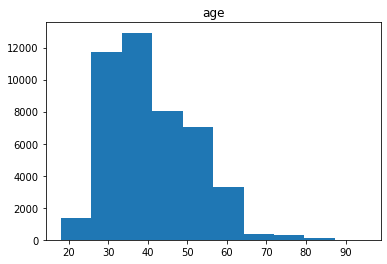

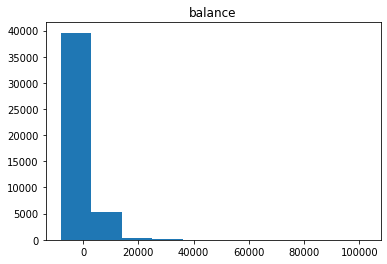

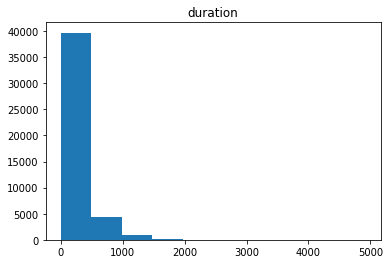

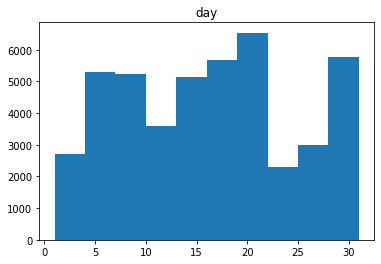

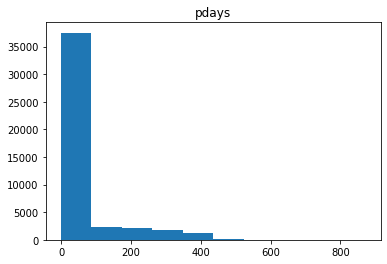

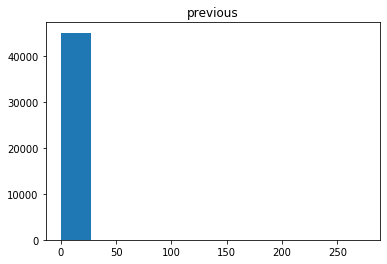

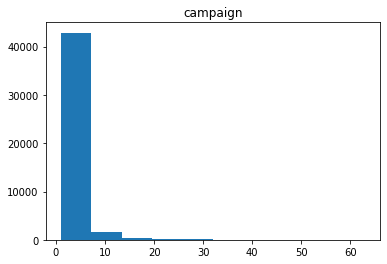

In [15]:
## Transformamos las variables numéricas a variables binarias (0,1)
for l in lista_numericas:
    plt.hist(df_bank[l])
    plt.title(l)
    plt.show()

In [16]:
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_feature = features[ite]
        x_features.remove(y_feature)
        
        x = data[x_features]
        y = data[y_feature]
        
        model.fit(data[x_features], data[y_feature])
        
        result[y_feature] = 1/(1 - model.score(data[x_features], data[y_feature]))
    
    return result

In [17]:
def selectDataUsingVIF(data, max_VIF =5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

vif = df_bank.copy(deep = True)

features = ['marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']
vif = vif[features]


result = selectDataUsingVIF(vif)

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-pack

In [18]:
### Observamos que hay que quitar 1 de cada variable dummie que hemos hecho. Lo haremos según la correlación que tenemos con la variable dependiente
result.head(1)

,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,1,0,0,1


In [19]:
columnas = list(result.columns)
y_bank = df_bank['y']
df_bank= df_bank[columnas]

In [20]:
print(columnas)

['marital_married', 'marital_single', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [21]:
X_train, X_test, y_train, y_test = train_test_split( df_bank,
                                                    y_bank,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_bank)

In [22]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

In [23]:
classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


matriz de confusión
[[7878  107]
 [ 859  199]]
accuracy
0.893177043016698
precision
0.6503267973856209
recall
0.1880907372400756
f1
0.2917888563049853
AUC
0.5873453060026301


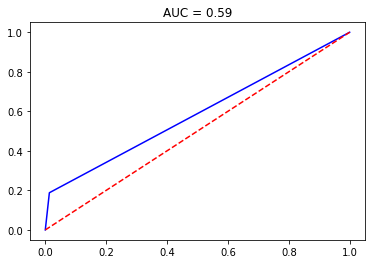

In [24]:
saca_metricas(y_test, y_pred)

In [25]:
X_test.shape

(9043, 7)

In [26]:
X_train.shape

(36168, 7)

Podemos guardar el modelo como un objeto de python (pickle) para después volver a usarlo para predecir futuros datos...

In [27]:
pkl_filename = "modelo1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 89.32 %


Si X_test fuese un conjunto de datos nuevo del banco para predecir que clientes pueden llegar a contratar el depósito del banco, utilizaremos la función predict_proba

In [28]:
modelo_proba = classifier.predict_proba(X_test)[:,1]
modelo_proba = (pd.DataFrame(modelo_proba,columns=['probabilidad'],index=X_test.index))
modelo_proba.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [29]:
modelo_proba.head()

,probabilidad
27974,0.704136
42227,0.704136
36001,0.704136
44575,0.703366
39647,0.703366
